# Final Project Data Analysis

In [134]:
# Importing libraries needed for the report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the datasets
survey1_data = pd.read_excel('Survey 1.xlsx')
survey2_data= pd.read_excel('Survey 2.xlsx')

# Define the mapping for 'Value' responses from strings to numerical values
response_mapping = {
    'Extremely dissatisfied': 1,
    'Somewhat dissatisfied': 2,
    'Neutral': 3,
    'Somewhat satisfied': 4,
    'Extremely satisfied': 5
}

# Define a mapping from numeric responses in Survey 2 to qualitative categories
response_mappings = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Define the explicit order from "Prefer not to say" to "More than 10 times a year"
appointment_frequency_order = [
    'Prefer not to say', '    Less than once a year', 'Once a year', '2-3 times a year', '4-6 times a year',
    '7-10 times a year', 'More than 10 times a year'
]

# Define the explicit order from "Prefer not to say" to "More than 6 months"
waiting_time_order = [
    'Prefer not to say', 'I usually get appointments on the same day', '    Less than a week', '1-2 weeks', '3-4 weeks', 
    '1-2 months', '3-6 months', 'More than 6 months'
]

response_order = [
    'Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'
]

# Demographics

## Gender - Survey 1 & 2

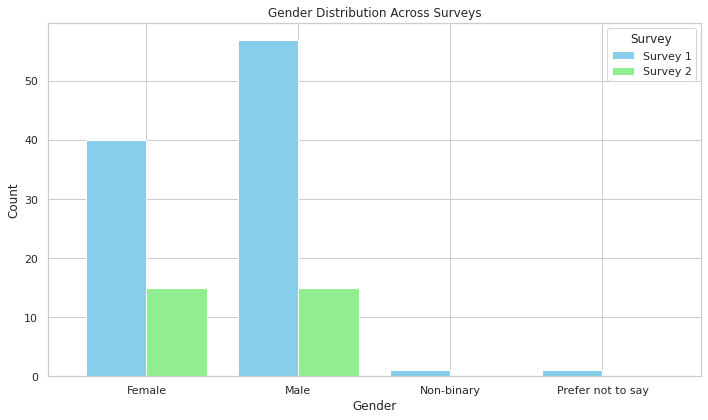

In [10]:
# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Create a DataFrame for combined visualization
combined_gender_df = pd.DataFrame({
    'Survey 1': survey1_data["How would you describe your gender?"].value_counts(),
    'Survey 2': survey2_data["How would you describe your gender?"].value_counts()
}).fillna(0)  # Fill missing values with 0 for consistency

# Generate a visualization for combined gender distribution
ax = combined_gender_df.plot(kind='bar', 
                             figsize=(10, 6),
                             width=0.8, 
                             color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution Across Surveys')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survey')

plt.tight_layout()
plt.show()


## Age Groups - Survey 1 & 2

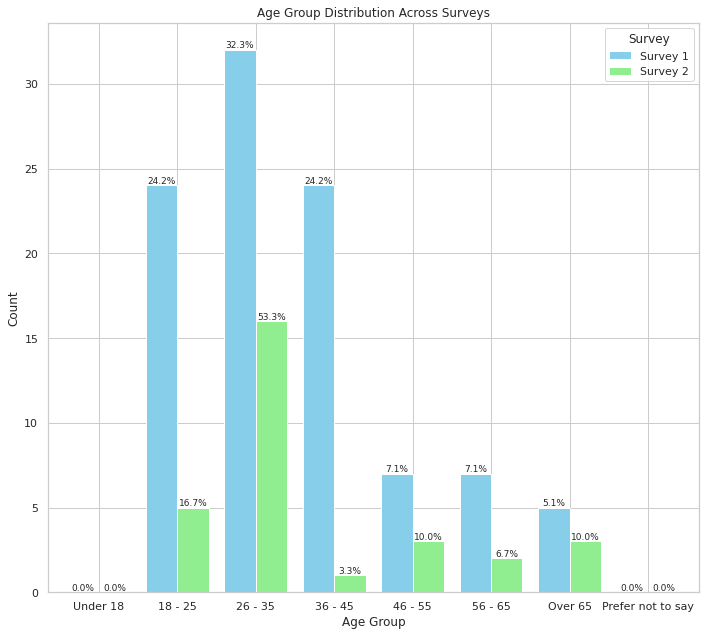

In [11]:
# Age groups and their counts from both surveys
age_groups = ['Under 18', '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', 'Over 65', 'Prefer not to say']
counts_survey_1 = [0, 24, 32, 24, 7, 7, 5, 0]
counts_survey_2 = [0, 5, 16, 1, 3, 2, 3, 0]

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Creating a DataFrame for visualization for both surveys
df_age_distribution = pd.DataFrame({
    'Age Group': age_groups,
    'Survey 1': counts_survey_1,
    'Survey 2': counts_survey_2
})

# Setting the index to 'Age Group' for easier plotting
df_age_distribution.set_index('Age Group', inplace=True)

# Plotting the age distribution for both surveys
ax = df_age_distribution.plot(kind='bar', 
                              figsize=(10, 9), 
                              width=0.8, 
                              color=['skyblue', 'lightgreen'])
plt.title('Age Group Distribution Across Surveys')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survey')
plt.tight_layout()

# Calculate total counts for each survey to compute percentages
total_counts_1 = sum(counts_survey_1)
total_counts_2 = sum(counts_survey_2)

# Annotate percentage on top of each bar manually
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    # Determine which total count to use based on the bar's index
    total = total_counts_1 if i < len(age_groups) else total_counts_2
    percentage = f'{height / total * 100:.1f}%'
    ax.text(rect.get_x() + rect.get_width() / 2, height, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

## Ethnicity - Survey 1 & 2

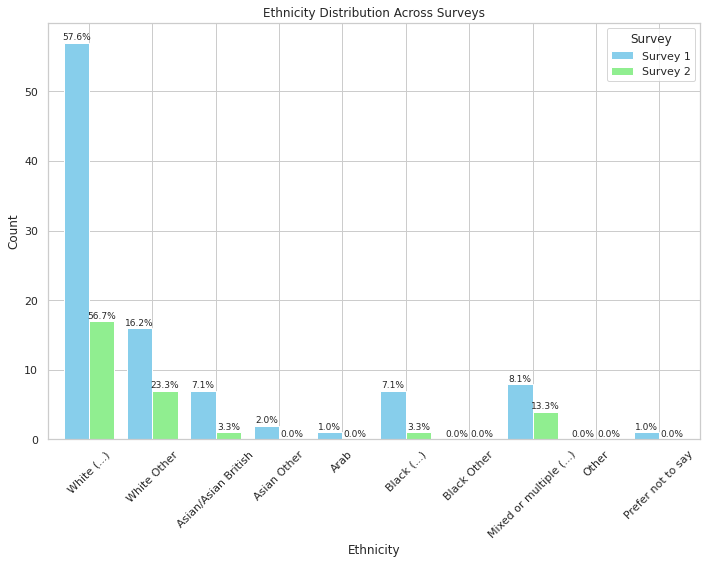

In [12]:
# Ethnicity labels and counts for both surveys
ethnicity_labels = [
    "White (...)", 
    "White Other", 
    "Asian/Asian British", 
    "Asian Other", 
    "Arab", 
    "Black (...)", 
    "Black Other", 
    "Mixed or multiple (...)", 
    "Other", 
    "Prefer not to say"
]
counts_survey_1 = [57, 16, 7, 2, 1, 7, 0, 8, 0, 1]
counts_survey_2 = [17, 7, 1, 0, 0, 1, 0, 4, 0, 0]

sns.set(style="whitegrid")

# Creating a DataFrame for the ethnicity distributions
df_ethnicity = pd.DataFrame({
    'Ethnicity': ethnicity_labels,
    'Survey 1': counts_survey_1,
    'Survey 2': counts_survey_2
}).set_index('Ethnicity')

# Plotting the ethnicity distribution for both surveys
ax = df_ethnicity.plot(kind='bar', 
                       figsize=(10, 8), 
                       width=0.8, 
                       color=['skyblue', 'lightgreen'])
plt.title('Ethnicity Distribution Across Surveys')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survey')
plt.tight_layout()

# Calculate total counts for each survey to compute percentages
total_counts_1 = sum(counts_survey_1)
total_counts_2 = sum(counts_survey_2)

# Annotate percentage on top of each bar manually
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    # Determine which total count to use based on the bar's index
    total = total_counts_1 if i < len(ethnicity_labels) else total_counts_2
    percentage = f'{height / total * 100:.1f}%'
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

## Technology Proficiency  - Survey 1

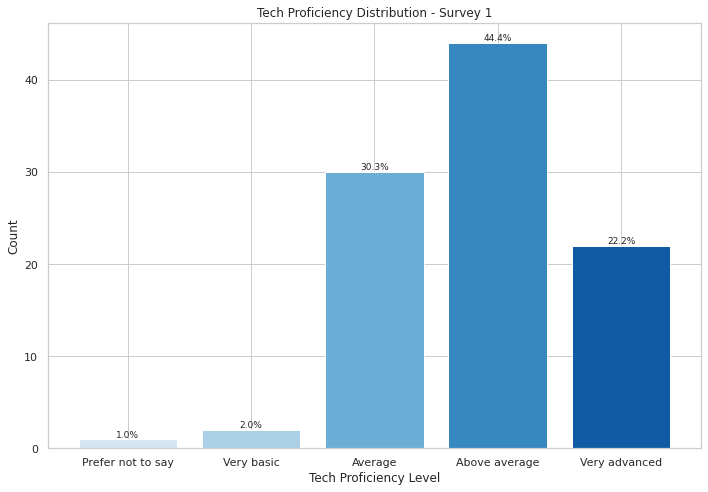

In [13]:
# Define the explicit order from "Prefer not to say" to "Very advanced"
tech_proficiency_order = [
    'Prefer not to say', 'Very basic', 'Average', 'Above average', 'Very advanced'
]

# Reorder the DataFrame according to the defined tech proficiency order
survey1_data = survey1_data["How would you describe your technology proficiency?"].value_counts().reindex(tech_proficiency_order)

# Generate a color palette with seaborn
palette = sns.color_palette("Blues", len(tech_proficiency_order))

# Plotting the tech proficiency distribution for Survey 1
plt.figure(figsize=(10, 7))
ax = survey1_data.plot(kind='bar', color=palette, width=0.8)
plt.title('Tech Proficiency Distribution - Survey 1')
plt.xlabel('Tech Proficiency Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Calculate total counts to compute percentages
total_counts = survey1_data.sum()

# Annotate percentage on top of each bar manually
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    percentage = f'{height / total_counts * 100:.1f}%' if total_counts else '0%'
    ax.text(rect.get_x() + rect.get_width() / 2, height, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

# Appointments frequency

## Generic doctor appointment frequency - Survey 1

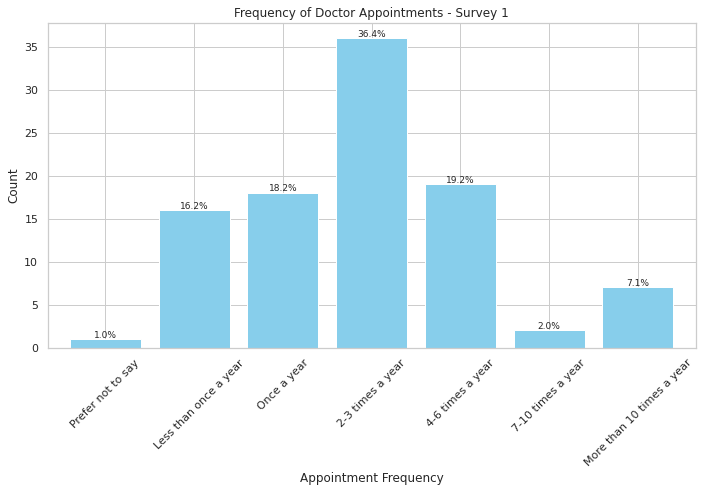

In [14]:
# Load the frequency of doctor appointments data from Survey 1
df_appointments_1 = pd.read_excel('Survey 1.xlsx', 
                                  usecols=["How frequently do you have NHS appointments, including both hospital in-patient and GP visits?"])

# Reorder the DataFrame according to the defined appointment frequency order
appointments_frequency_counts_ordered = df_appointments_1["How frequently do you have NHS appointments, including both hospital in-patient and GP visits?"].value_counts().reindex(appointment_frequency_order)

# Plotting the frequency of doctor appointments distribution for Survey 1
plt.figure(figsize=(10, 7))
ax = appointments_frequency_counts_ordered.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Frequency of Doctor Appointments - Survey 1')
plt.xlabel('Appointment Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate total counts to compute percentages
total_counts = appointments_frequency_counts_ordered.sum()

# Annotate percentage on top of each bar manually
for rect in ax.patches:
    height = rect.get_height()
    percentage = f'{height / total_counts * 100:.1f}%' if total_counts else '0%'
    ax.text(rect.get_x() + rect.get_width() / 2, height, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

## GP VS Specialist Appointment Frequency - Survey 2

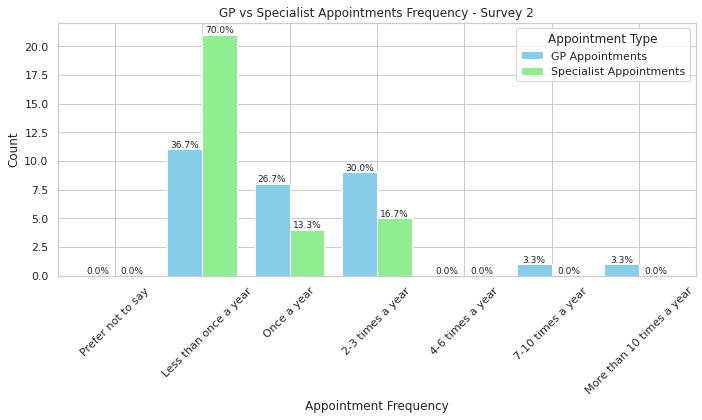

In [15]:
# Load the frequency of GP and specialist appointments data from Survey 2
df_gp_appointments_2 = pd.read_excel('Survey 2.xlsx', 
                                     usecols=["How frequently do you have in-person GP appointments?"])

df_specialist_appointments_2 = pd.read_excel('Survey 2.xlsx', 
                                             usecols=["How frequently do you have referrals appointments in-hospital?"])

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Aggregate the frequency of appointments data from Survey 2 for both GP and Specialist, reindexing according to the defined order
gp_appointments_frequency_counts_2 = df_gp_appointments_2["How frequently do you have in-person GP appointments?"].value_counts().reindex(appointment_frequency_order, fill_value=0)
specialist_appointments_frequency_counts_2 = df_specialist_appointments_2["How frequently do you have referrals appointments in-hospital?"].value_counts().reindex(appointment_frequency_order, fill_value=0)

# Creating combined DataFrame for GP vs Specialist appointments
df_combined_appointments = pd.DataFrame({
    'GP Appointments': gp_appointments_frequency_counts_2,
    'Specialist Appointments': specialist_appointments_frequency_counts_2
})

# Plotting the combined visualization for GP vs Specialist appointments
ax = df_combined_appointments.plot(kind='bar', 
                                   figsize=(10, 6), 
                                   width=0.8,
                                   color=['skyblue', 'lightgreen'])
plt.title('GP vs Specialist Appointments Frequency - Survey 2')
plt.xlabel('Appointment Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45, ticks=range(len(appointment_frequency_order)), labels=appointment_frequency_order)
plt.legend(title='Appointment Type')
plt.tight_layout()

# Calculate total counts to compute percentages for GP and Specialist appointments
total_gp_appointments = gp_appointments_frequency_counts_2.sum()
total_specialist_appointments = specialist_appointments_frequency_counts_2.sum()

# Annotate percentage on top of each bar manually
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    total = total_gp_appointments if i < len(df_combined_appointments) else total_specialist_appointments
    percentage = f'{height / total * 100:.1f}%' if total > 0 else '0%'
    ax.text(rect.get_x() + rect.get_width() / 2, height, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

# Appointments waiting times

## Generic Doctor appointment waiting times - Survey 1

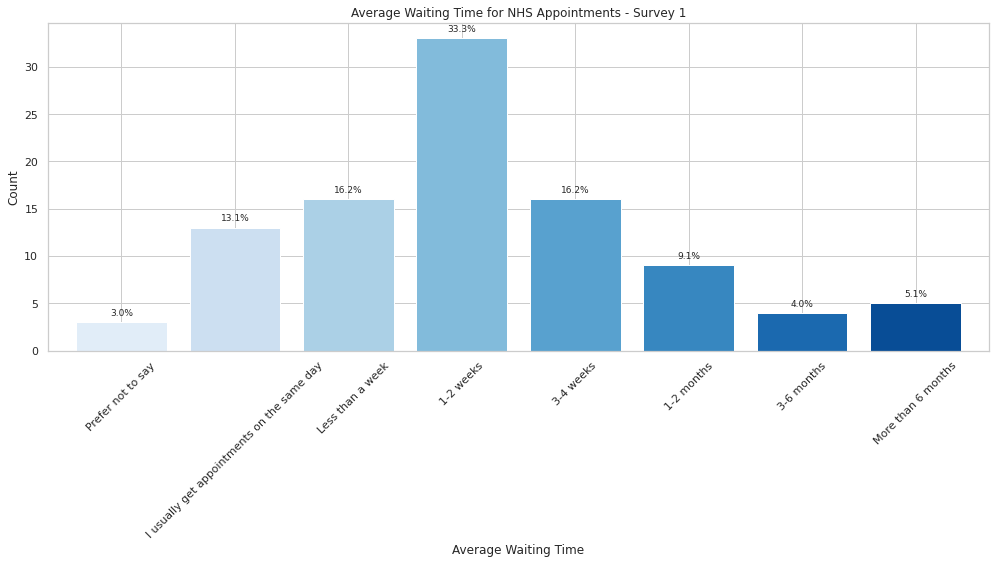

In [16]:
# Load the waiting times from Survey 1
df_waiting_time_1 = pd.read_excel('Survey 1.xlsx', 
                                  usecols=["On average, how long do you wait for NHS appointments from the time you request it or schedule it?\n"])

# Reorder the DataFrame according to the defined waiting time order
df_waiting_time_1_df = df_waiting_time_1.iloc[:, 0].value_counts().to_frame(name="Count")
df_waiting_time_1_ordered = df_waiting_time_1_df.reindex(waiting_time_order)

# Generate a color palette with seaborn
colors = sns.color_palette("Blues", len(waiting_time_order))

# Plotting the average waiting times distribution for Survey 1
plt.figure(figsize=(14, 8))
ax = df_waiting_time_1_ordered['Count'].plot(kind='bar', color=colors, width=0.8)
plt.title('Average Waiting Time for NHS Appointments - Survey 1')
plt.xlabel('Average Waiting Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ticks=range(len(waiting_time_order)), labels=waiting_time_order)
plt.tight_layout()

# Calculate total counts to compute percentages
total_counts = df_waiting_time_1_ordered["Count"].sum()

# Annotate percentage on top of each bar manually
for rect in ax.patches:
    height = rect.get_height()
    percentage = f'{height / total_counts * 100:.1f}%' if total_counts else '0%'
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, percentage, ha='center', va='bottom', rotation=0, fontsize=9)

plt.show()

## GP and Specialist Waiting times - Survey 2

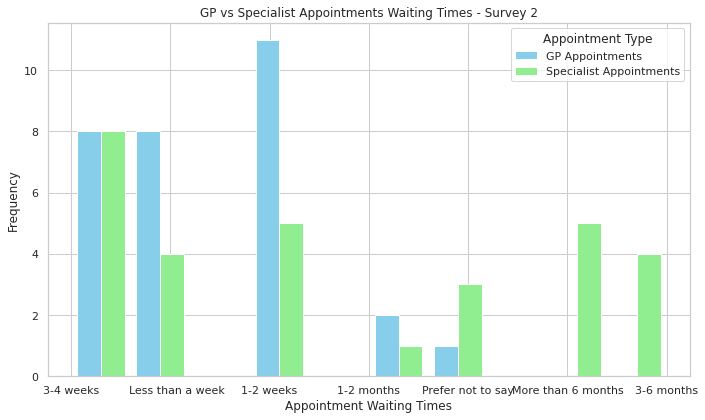

In [17]:
# Load the waiting times of GP and specialist appointments data from Survey 2
df_gp_waiting_time_2 = pd.read_excel('Survey 2.xlsx', 
usecols = ["On average, how long do you wait for in-person GP appointments from the time you request it?\n"])

df_specialist_waiting_time_2 = pd.read_excel('Survey 2.xlsx', 
usecols = ["On average, how long do you wait for your referral appointments from the time you request/are reffered?\n"])

# Aggregate the waiting times data from Survey 2 for both GP and Specialist
gp_waiting_time_counts_2 = df_gp_waiting_time_2.iloc[:, 0].value_counts()
specialist_waiting_time_counts_2 = df_specialist_waiting_time_2.iloc[:, 0].value_counts()

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Example placeholder visualisation
plt.figure(figsize = (10, 6))
plt.hist([df_gp_waiting_time_2.iloc[:, 0], 
          df_specialist_waiting_time_2.iloc[:, 0]],
          color = ['skyblue', 'lightgreen'], 
          label = ['GP Appointments', 'Specialist Appointments'])

plt.title('GP vs Specialist Appointments Waiting Times - Survey 2')
plt.xlabel('Appointment Waiting Times')
plt.ylabel('Frequency')
plt.legend(title = 'Appointment Type')
plt.tight_layout()

plt.show()

# NHS Perceptions

## Brand & Reputation - Survey 1 & 2

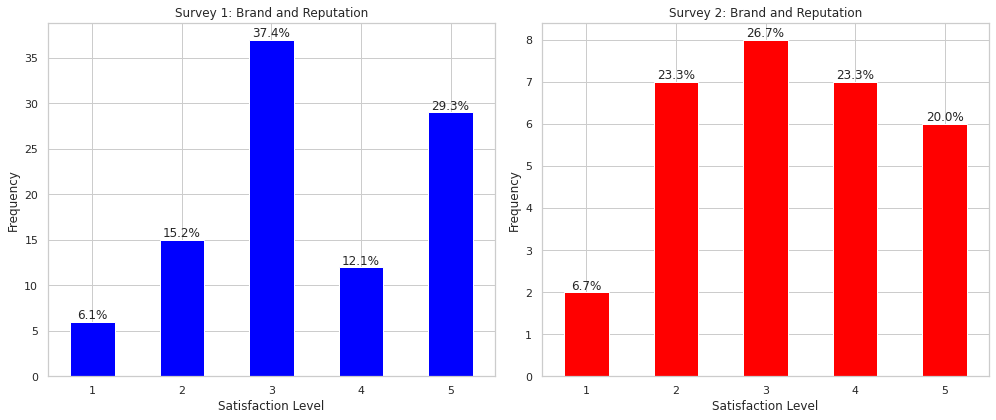

In [21]:
# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Calculate frequencies for 'Brand and reputation' responses
survey1_brand_frequency = survey1_data['Brand and reputation'].value_counts().sort_index()
survey2_brand_frequency = survey2_data['Brand and reputation'].value_counts().sort_index()

# Calculate the total number of responses to get the percentage
total_survey1_brand_responses = survey1_data['Brand and reputation'].notnull().sum()
total_survey2_brand_responses = survey2_data['Brand and reputation'].notnull().sum()

# Plot histograms for the 'Brand and reputation' responses from both surveys side by side, with frequencies
plt.figure(figsize=(14, 6))

# Survey 1 Histogram for 'Brand and reputation'
plt.subplot(1, 2, 1)
bars1 = survey1_brand_frequency.plot(kind='bar', color='blue')
plt.title('Survey 1: Brand and Reputation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey1_brand_frequency)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 1 with percentage
for bar in bars1.patches:
    percentage = (bar.get_height() / total_survey1_brand_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Survey 2 Histogram for 'Brand and reputation'
plt.subplot(1, 2, 2)
bars2 = survey2_brand_frequency.plot(kind='bar', color='red')
plt.title('Survey 2: Brand and Reputation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_brand_frequency)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 2 with percentage
for bar in bars2.patches:
    percentage = (bar.get_height() / total_survey2_brand_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Value - Survey 1 & 2

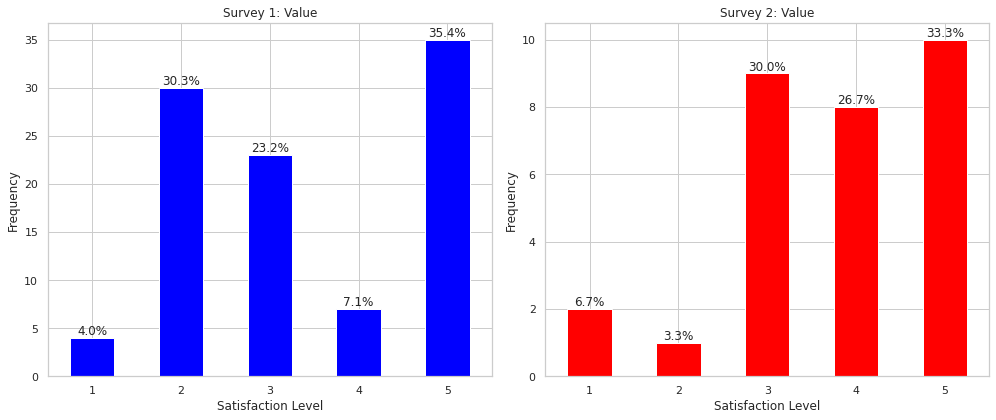

In [32]:
# Calculate the frequency of 'Value' responses for both surveys
survey1_value_frequency = survey1_data['Value'].value_counts().sort_index()
survey2_value_frequency = survey2_data['Value'].value_counts().sort_index()

# Total responses for calculating percentages
total_survey1_value_responses = survey1_value_frequency.sum()
total_survey2_value_responses = survey2_value_frequency.sum()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Survey 1 Histogram
ax1 = plt.subplot(1, 2, 1)
survey1_value_frequency.plot(kind='bar', color='blue', ax=ax1)
plt.title('Survey 1: Value')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 1
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_survey1_value_responses) * 100
    ax1.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

# Survey 2 Histogram
ax2 = plt.subplot(1, 2, 2)
survey2_value_frequency.plot(kind='bar', color='red', ax=ax2)
plt.title('Survey 2: Value')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 2
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_survey2_value_responses) * 100
    ax2.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Personal Experience - Survey 1 & 2

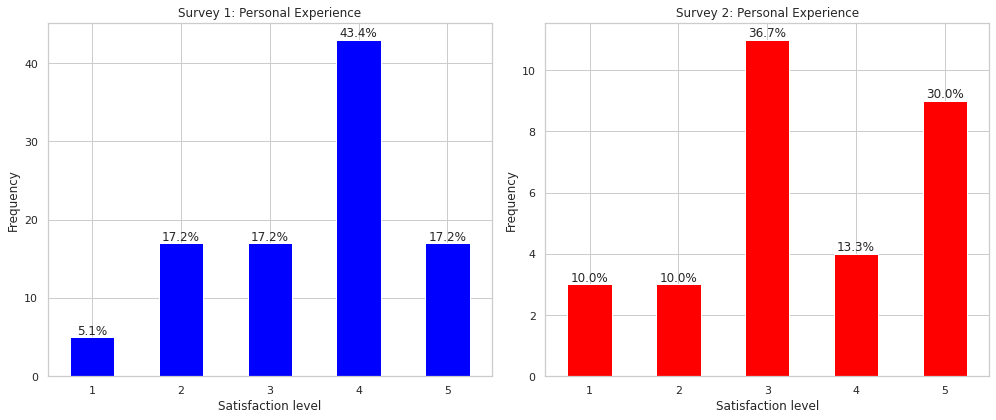

In [33]:
# Apply the mapping to the 'Personal experience' column in Survey 1
survey1_data['Personal experience'] = survey1_data['Personal experience'].map(response_mapping)

# Calculate frequencies for 'Personal experience' responses
survey1_personal_experience_frequency = survey1_data['Personal experience'].value_counts().sort_index()
survey2_personal_experience_frequency = survey2_data['Personal experience'].value_counts().sort_index()

# Calculate the total number of responses to get the percentage
total_survey1_responses = survey1_data['Personal experience'].notnull().sum()
total_survey2_responses = survey2_data['Personal experience'].notnull().sum()

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Plot histograms for the 'Personal experience' responses from both surveys side by side, with frequencies
plt.figure(figsize=(14, 6))

# Survey 1 Histogram for 'Personal experience'
ax1 = plt.subplot(1, 2, 1)
survey1_personal_experience_frequency.plot(kind='bar', color='blue', ax=ax1)
plt.title('Survey 1: Personal Experience')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 1 with percentage
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_survey1_responses) * 100
    ax1.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

# Survey 2 Histogram for 'Personal experience'
ax2 = plt.subplot(1, 2, 2)
survey2_personal_experience_frequency.plot(kind='bar', color='red', ax=ax2)
plt.title('Survey 2: Personal Experience')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 2 with percentage
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_survey2_responses) * 100
    ax2.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Hospital CheckIns - Survey 1 & 2

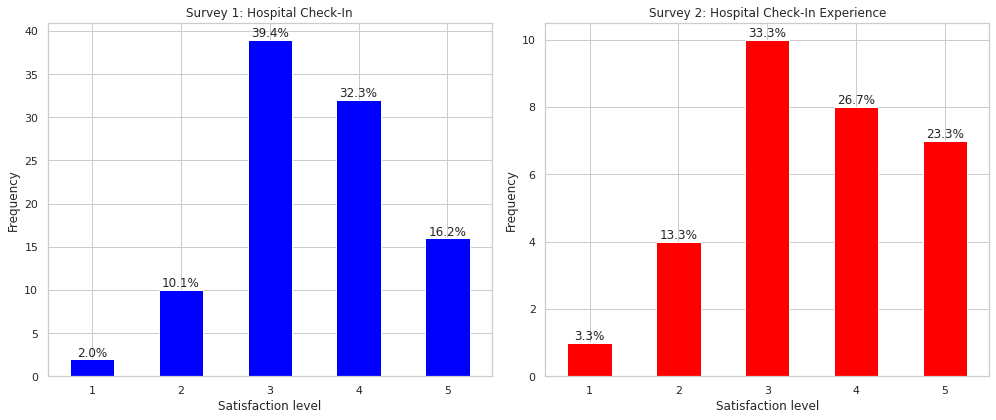

In [34]:
# Apply the mapping to the 'Hospital check-in' column in Survey 1 if it exists and is textual
if 'Hospital check-in' in survey1_data.columns:
    survey1_data['Hospital check-in'] = survey1_data['Hospital check-in'].map(response_mapping)

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1 - 'Hospital check-in'
if 'Hospital check-in' in survey1_data.columns:
    plt.subplot(1, 2, 1)
    survey1_check_in_counts = survey1_data['Hospital check-in'].value_counts().sort_index()
    bars1 = survey1_check_in_counts.plot(kind='bar', color='blue')
    plt.title('Survey 1: Hospital Check-In')
    plt.xlabel('Satisfaction level')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey1_check_in_counts)), labels=[1, 2, 3, 4, 5], rotation=0)
    
    # Annotate bars with percentage for Survey 1
    total_responses_survey1 = survey1_data['Hospital check-in'].notnull().sum()
    for bar in bars1.patches:
        percentage = (bar.get_height() / total_responses_survey1) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2 - 'Hospital check-in experience'
plt.subplot(1, 2, 2)
survey2_check_in_counts = survey2_data['Hospital check-in experience'].value_counts().sort_index()
bars2 = survey2_check_in_counts.plot(kind='bar', color='red')
plt.title('Survey 2: Hospital Check-In Experience')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_check_in_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 2
total_responses_survey2 = survey2_data['Hospital check-in experience'].notnull().sum()
for bar in bars2.patches:
    percentage = (bar.get_height() / total_responses_survey2) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### When arriving at the hospital, do you know where to go? 

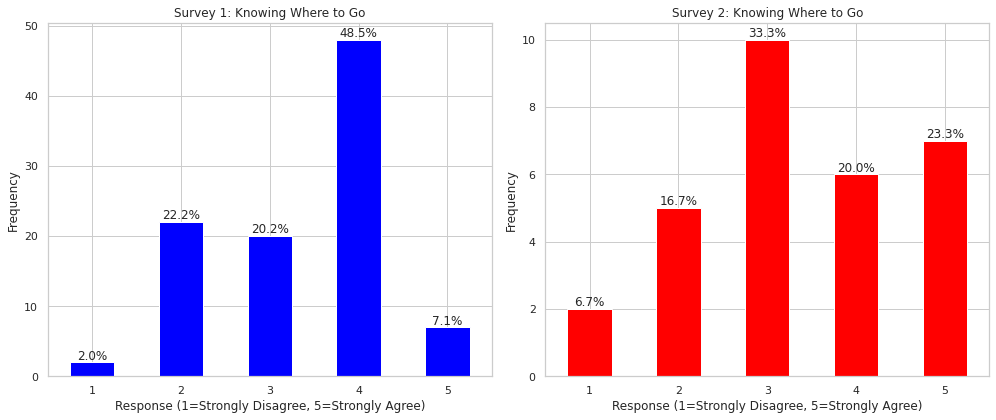

In [35]:
# Define the mapping of verbal responses to numerical values
response_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral ": 3,
    "Agree": 4,
    "Strongly Agree ": 5
}

# Apply the mapping to the 'When I arrive at the hospital I know where I have to go' column in Survey 1 if it exists and is textual
if 'When I arrive at the hospital I know where I have to go ' in survey1_data.columns:
    survey1_data['When I arrive at the hospital I know where I have to go '] = survey1_data['When I arrive at the hospital I know where I have to go '].map(response_mapping)

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1 - 'When I arrive at the hospital I know where I have to go'
if 'When I arrive at the hospital I know where I have to go ' in survey1_data.columns:
    plt.subplot(1, 2, 1)
    survey1_direction_counts = survey1_data['When I arrive at the hospital I know where I have to go '].value_counts().sort_index()
    bars1 = survey1_direction_counts.plot(kind='bar', color='blue')
    plt.title('Survey 1: Knowing Where to Go')
    plt.xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey1_direction_counts)), labels=[1, 2, 3, 4, 5], rotation=0)
    
    # Annotate bars with percentage for Survey 1
    total_responses_survey1 = survey1_data['When I arrive at the hospital I know where I have to go '].notnull().sum()
    for bar in bars1.patches:
        percentage = (bar.get_height() / total_responses_survey1) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2 - 'When I arrive at the hospital I know where I have to go' (already numerical)
plt.subplot(1, 2, 2)
survey2_direction_counts = survey2_data['When I arrive at the hospital I know where I have to go '].value_counts().sort_index()
bars2 = survey2_direction_counts.plot(kind='bar', color='red')
plt.title('Survey 2: Knowing Where to Go')
plt.xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_direction_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 2
total_responses_survey2 = survey2_data['When I arrive at the hospital I know where I have to go '].notnull().sum()
for bar in bars2.patches:
    percentage = (bar.get_height() / total_responses_survey2) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Do I know how to reach my appointment? 

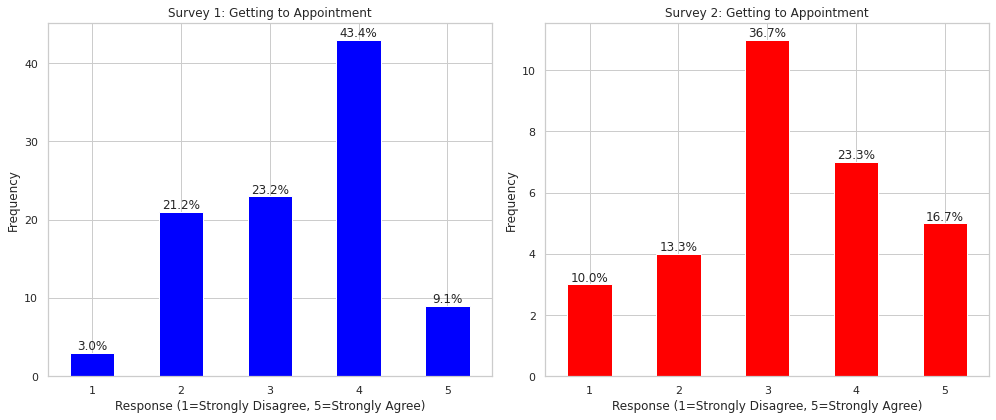

In [36]:
# Define the mapping of verbal responses to numerical values for Survey 1
response_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral ": 3,
    "Agree": 4,
    "Strongly Agree ": 5
}

# Check for column name in Survey 1 with exact match or similar due to spaces
survey1_column_name = [col for col in survey1_data.columns if "When I arrive at the hospital I know how to get to my appointment" in col]
if survey1_column_name:
    survey1_column = survey1_column_name[0]  # Take the first matching column name
    survey1_data[survey1_column] = survey1_data[survey1_column].map(response_mapping)

# For Survey 2, ensure to trim spaces in column names if needed
survey2_column_name = [col for col in survey2_data.columns if "When I arrive at the hospital I know how to get to my appointment".strip() in col]
if survey2_column_name:
    survey2_column = survey2_column_name[0]  # Take the first matching column name

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1 - 'When I arrive at the hospital I know how to get to my appointment'
if survey1_column_name:
    plt.subplot(1, 2, 1)
    survey1_get_to_appointment_counts = survey1_data[survey1_column].value_counts().sort_index()
    bars1 = survey1_get_to_appointment_counts.plot(kind='bar', color='blue')
    plt.title('Survey 1: Getting to Appointment')
    plt.xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey1_get_to_appointment_counts)), labels=[1, 2, 3, 4, 5], rotation=0)
    
    # Annotate bars with percentage for Survey 1
    total_responses_survey1 = survey1_data[survey1_column].notnull().sum()
    for bar in bars1.patches:
        percentage = (bar.get_height() / total_responses_survey1) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2 - 'When I arrive at the hospital I know how to get to my appointment'
if survey2_column_name:
    plt.subplot(1, 2, 2)
    survey2_get_to_appointment_counts = survey2_data[survey2_column].value_counts().sort_index()
    bars2 = survey2_get_to_appointment_counts.plot(kind='bar', color='red')
    plt.title('Survey 2: Getting to Appointment')
    plt.xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey2_get_to_appointment_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

    # Annotate bars with percentage for Survey 2
    total_responses_survey2 = survey2_data[survey2_column].notnull().sum()
    for bar in bars2.patches:
        percentage = (bar.get_height() / total_responses_survey2) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Direction within the hospitals are clear

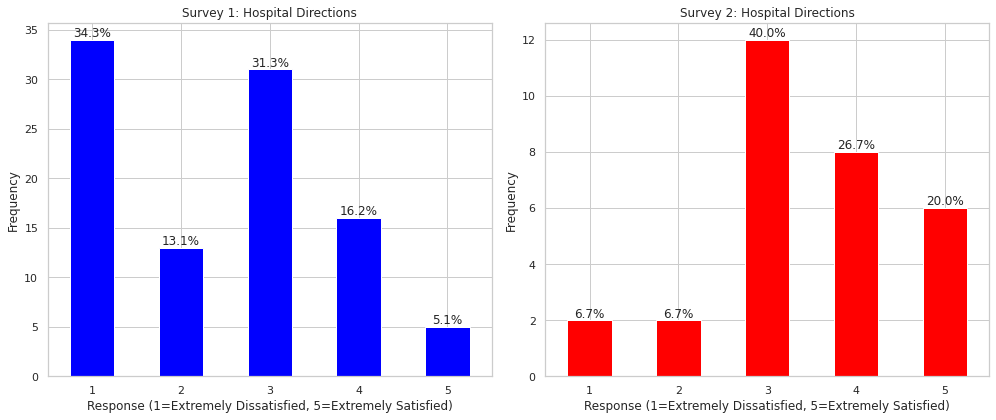

In [37]:
# Define the column names to search for
search_string = "Directions within the hospitals are clear and easy to follow"

# Check for column name in Survey 1 with exact match or similar due to spaces
survey1_column_name = [col for col in survey1_data.columns if search_string in col]
survey2_column_name = [col for col in survey2_data.columns if search_string.strip() in col]

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1
if survey1_column_name:
    plt.subplot(1, 2, 1)
    survey1_column = survey1_column_name[0]
    survey1_directions_counts = survey1_data[survey1_column].value_counts().sort_index()
    bars1 = survey1_directions_counts.plot(kind='bar', color='blue')
    plt.title('Survey 1: Hospital Directions')
    plt.xlabel('Response (1=Extremely Dissatisfied, 5=Extremely Satisfied)')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey1_directions_counts)), labels=[1, 2, 3, 4, 5], rotation=0)
    
    # Annotate bars with percentage for Survey 1
    total_responses_survey1 = survey1_data[survey1_column].notnull().sum()
    for bar in bars1.patches:
        percentage = (bar.get_height() / total_responses_survey1) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2
if survey2_column_name:
    plt.subplot(1, 2, 2)
    survey2_column = survey2_column_name[0]
    survey2_directions_counts = survey2_data[survey2_column].value_counts().sort_index()
    bars2 = survey2_directions_counts.plot(kind='bar', color='red')
    plt.title('Survey 2: Hospital Directions')
    plt.xlabel('Response (1=Extremely Dissatisfied, 5=Extremely Satisfied)')
    plt.ylabel('Frequency')
    plt.xticks(ticks=np.arange(len(survey2_directions_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

    # Annotate bars with percentage for Survey 2
    total_responses_survey2 = survey2_data[survey2_column].notnull().sum()
    for bar in bars2.patches:
        percentage = (bar.get_height() / total_responses_survey2) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Appointment booking system - Survey 1 & 2

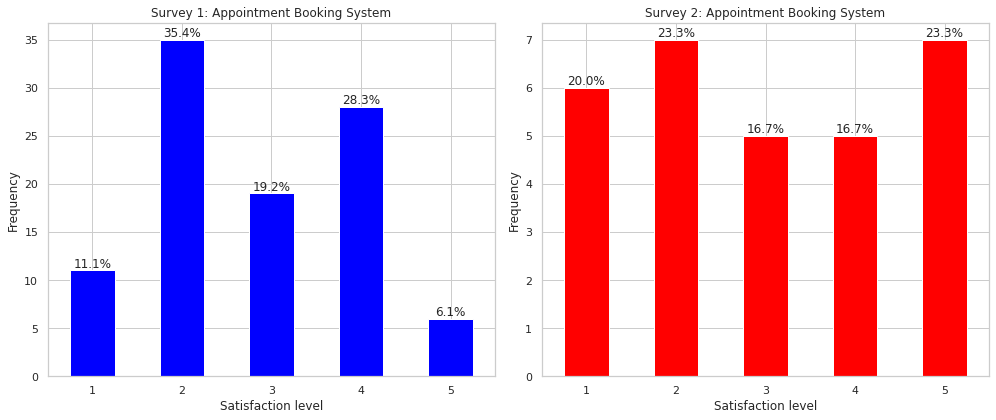

In [41]:
# Apply the mapping to the 'Appointment booking system' column in Survey 1 and Survey 2
survey1_data['Appointment booking system'] = survey1_data['Appointment booking system'].map(response_mapping)

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1
plt.subplot(1, 2, 1)
survey1_counts = survey1_data['Appointment booking system'].value_counts().sort_index()
bars1 = survey1_counts.plot(kind='bar', color='blue')
plt.title('Survey 1: Appointment Booking System')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey1_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate Survey 1 bars with percentage
total_survey1_responses = survey1_data['Appointment booking system'].notnull().sum()
for i, bar in enumerate(bars1.patches):
    percentage = (survey1_counts.iloc[i] / total_survey1_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2
plt.subplot(1, 2, 2)
survey2_counts = survey2_data['Appointment booking system'].value_counts().sort_index()
bars2 = survey2_counts.plot(kind='bar', color='red')
plt.title('Survey 2: Appointment Booking System')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate Survey 2 bars with percentage
total_survey2_responses = survey2_data['Appointment booking system'].notnull().sum()
for i, bar in enumerate(bars2.patches):
    percentage = (survey2_counts.iloc[i] / total_survey2_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Easy to reschedule appointments? 

<ipython-input-42-8d7e58d2b6e2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
<ipython-input-42-8d7e58d2b6e2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)


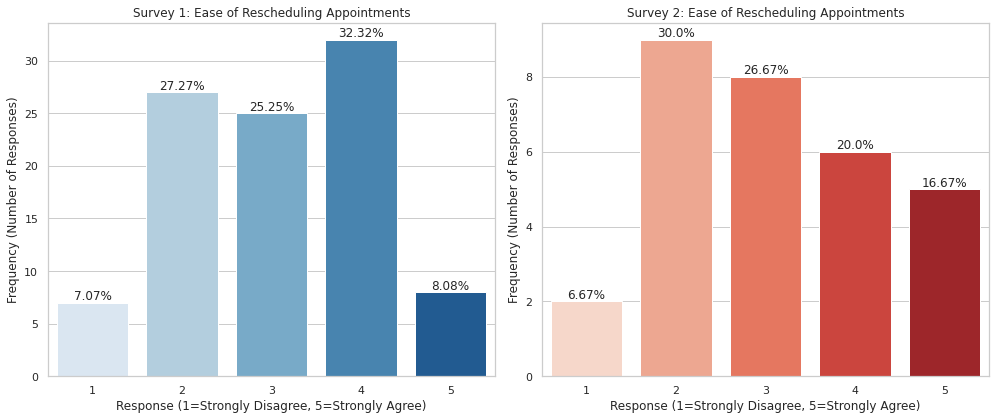

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming survey1_data and survey2_data are already loaded and processed

# Mapping for Survey 1 responses
response_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral ': 3,  # Adjusted for spacing
    'Agree': 4,
    'Strongly Agree ': 5  # Adjusted for spacing
}

# Correctly apply the mapping for Survey 1
survey1_data['Mapped Reschedule'] = survey1_data['I find it easy to reschedule my appointment'].map(response_mapping)

# For Survey 2, since the data is already numerical
survey2_reschedule = survey2_data['It is easy to reschedule my appointment'].dropna()

# Adjusted Function to plot the survey responses with frequency on the y-axis and percentages on top
def plot_survey_responses(survey_data, title, ax, palette):
    # Ensure all categories from 1 to 5 are represented
    counts = survey_data.value_counts().sort_index()
    counts = counts.reindex(np.arange(1, 6), fill_value=0)  # Include all categories from 1 to 5
    total_responses = survey_data.notnull().sum()  # Total number of non-null responses
    percentages = (counts / total_responses * 100).round(2)  # Calculate percentages
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    ax.set_ylabel('Frequency (Number of Responses)')
    ax.set_xticks(range(5))  # Show all values from 1 to 5
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    
    # Add percentage on top of each bar
    for index, value in enumerate(counts):
        percentage_text = f'{percentages.iloc[index]}%'
        ax.text(index, value, percentage_text, ha='center', va='bottom')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plot_survey_responses(survey1_data['Mapped Reschedule'].dropna(), 'Survey 1: Ease of Rescheduling Appointments', axs[0], "Blues")
plot_survey_responses(survey2_reschedule, 'Survey 2: Ease of Rescheduling Appointments', axs[1], "Reds")
plt.tight_layout()
plt.show()


### Easy to cancel / confirm? 

<ipython-input-46-977ee2085fef>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
<ipython-input-46-977ee2085fef>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
<ipython-input-46-977ee2085fef>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)


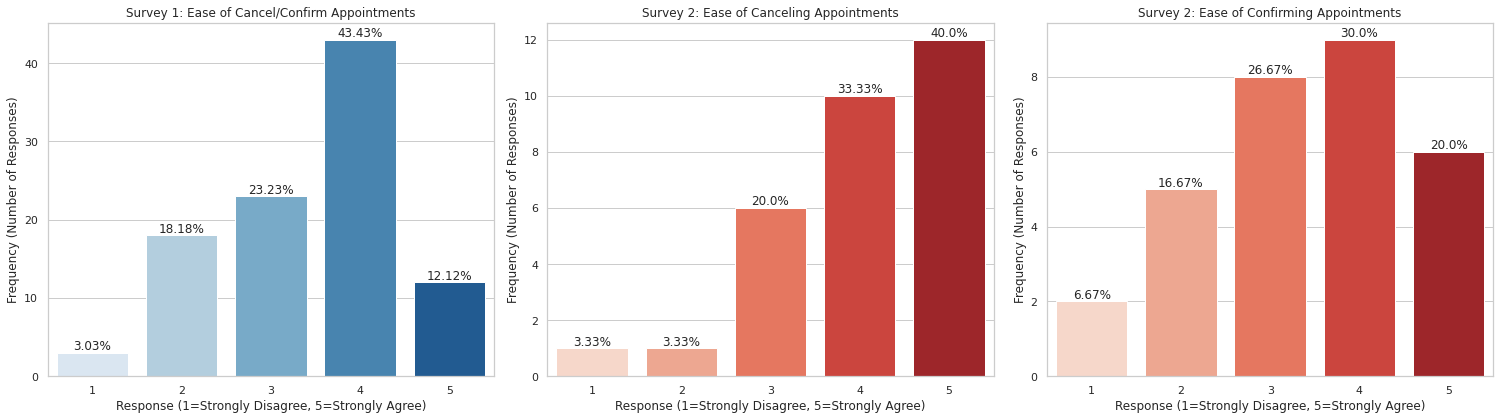

In [46]:
# Mapping for Survey 1 responses
response_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral ': 3,  # Adjusted for spacing
    'Agree': 4,
    'Strongly Agree ': 5  # Adjusted for spacing
}

# Apply the mapping for Survey 1 for the "cancel/confirm" question
survey1_cancel_confirm_mapped = survey1_data['I find it easy to cancel / confirm my appointments '].map(response_mapping)

# For Survey 2, since the data for "cancel" and "confirm" is already numerical
survey2_cancel = survey2_data['It is easy to cancel my appointments '].dropna()
survey2_confirm = survey2_data['It is easy to confirm my appointments'].dropna()

# Function to plot the survey responses with frequency on the y-axis and percentages on top
def plot_survey_responses(survey_data, title, ax, palette):
    # Ensure all categories from 1 to 5 are represented
    counts = survey_data.value_counts().sort_index()
    counts = counts.reindex(np.arange(1, 6), fill_value=0)  # Include all categories from 1 to 5
    total_responses = survey_data.notnull().sum()  # Total number of non-null responses
    percentages = (counts / total_responses * 100).round(2)  # Calculate percentages
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    ax.set_ylabel('Frequency (Number of Responses)')
    ax.set_xticks(range(5))  # Show all values from 1 to 5
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    
    # Add percentage on top of each bar
    for index, value in enumerate(counts):
        percentage_text = f'{percentages.iloc[index]}%'
        ax.text(index, value, percentage_text, ha='center', va='bottom')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(21, 6))  # Adjust figsize for 3 subplots
plot_survey_responses(survey1_cancel_confirm_mapped.dropna(), 'Survey 1: Ease of Cancel/Confirm Appointments', axs[0], "Blues")
plot_survey_responses(survey2_cancel, 'Survey 2: Ease of Canceling Appointments', axs[1], "Reds")
plot_survey_responses(survey2_confirm, 'Survey 2: Ease of Confirming Appointments', axs[2], "Reds")  # Using Greens for the third visualization
plt.tight_layout()
plt.show()


## Accessibility - Survey 1 & 2

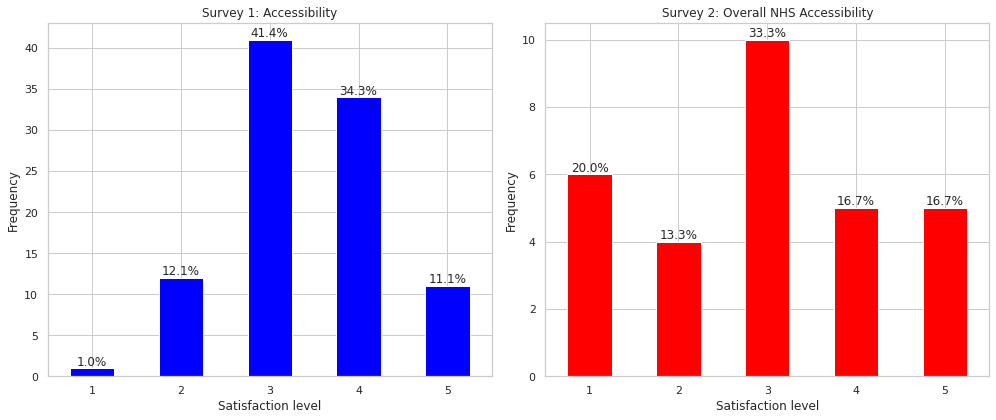

In [50]:
# Apply the mapping to the 'Accessibility' column in Survey 1
survey1_data['Accessibility'] = survey1_data['Accessibility'].map(response_mapping)

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Plot for Survey 1 - 'Accessibility'
plt.subplot(1, 2, 1)
survey1_accessibility_counts = survey1_data['Accessibility'].value_counts().sort_index()
bars1 = survey1_accessibility_counts.plot(kind='bar', color='blue')
plt.title('Survey 1: Accessibility')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey1_accessibility_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 1
total_responses_survey1 = survey1_data['Accessibility'].notnull().sum()
for bar in bars1.patches:
    percentage = (bar.get_height() / total_responses_survey1) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Plot for Survey 2 - 'Overall NHS Accessibility'
plt.subplot(1, 2, 2)
survey2_accessibility_counts = survey2_data['Overall NHS Accessibility'].value_counts().sort_index()
bars2 = survey2_accessibility_counts.plot(kind='bar', color='red')
plt.title('Survey 2: Overall NHS Accessibility')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_accessibility_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 2
total_responses_survey2 = survey2_data['Overall NHS Accessibility'].notnull().sum()
for bar in bars2.patches:
    percentage = (bar.get_height() / total_responses_survey2) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Staff to Patient Communication - Survey 1 & 2

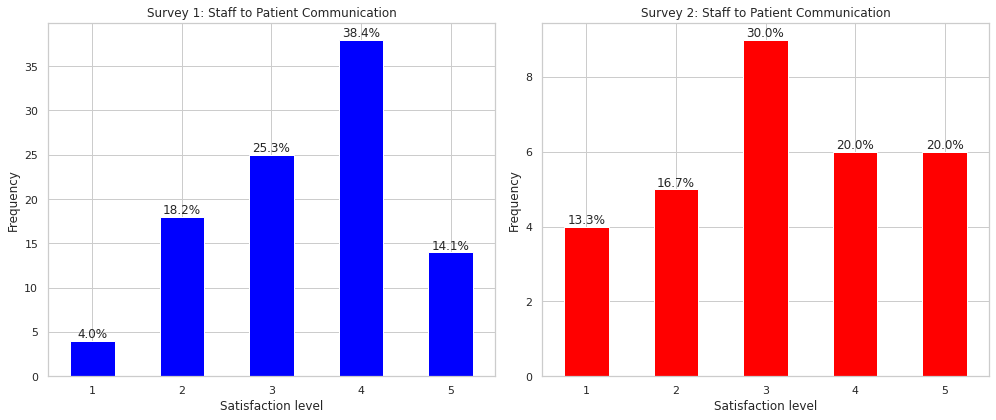

In [51]:
# Apply the mapping to the 'Staff to patient communication' column in Survey 1
survey1_data['Staff to patient communication'] = survey1_data['Staff to patient communication'].map(response_mapping)

# Applying the grid in the background of the chart
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Survey 1 Histogram for 'Staff to patient communication'
plt.subplot(1, 2, 1)
survey1_communication_counts = survey1_data['Staff to patient communication'].value_counts().sort_index()
bars1 = survey1_communication_counts.plot(kind='bar', color='blue')
plt.title('Survey 1: Staff to Patient Communication')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey1_communication_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 1
total_responses_survey1 = survey1_data['Staff to patient communication'].notnull().sum()
for bar in bars1.patches:
    percentage = (bar.get_height() / total_responses_survey1) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Survey 2 Histogram for 'Staff to patient communication'
plt.subplot(1, 2, 2)
survey2_communication_counts = survey2_data['Staff to patient communication'].value_counts().sort_index()
bars2 = survey2_communication_counts.plot(kind='bar', color='red')
plt.title('Survey 2: Staff to Patient Communication')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_communication_counts)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars with percentage for Survey 2
total_responses_survey2 = survey2_data['Staff to patient communication'].notnull().sum()
for bar in bars2.patches:
    percentage = (bar.get_height() / total_responses_survey2) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Letter receival 

<ipython-input-52-413e20b77cfe>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
<ipython-input-52-413e20b77cfe>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)


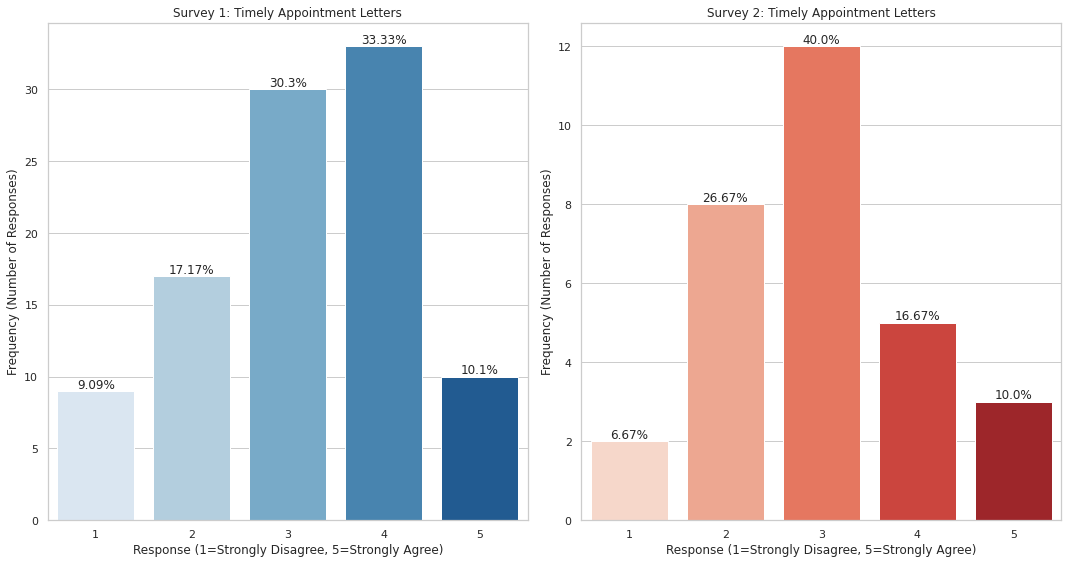

In [52]:
# Mapping for Survey 1 responses
response_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral ': 3,  # Adjusted for spacing
    'Agree': 4,
    'Strongly Agree ': 5  # Adjusted for spacing
}

# Apply the mapping for Survey 1 for the "appointment letters on timely matters" question
survey1_appointment_letters = survey1_data['I always receive my appointment letters on timely matters'].map(response_mapping)

# For Survey 2, questions are already numerical
survey2_appointment_letters = survey2_data['I receive my appointment letters on timely matters'].dropna()

# Adjusted Function to plot the survey responses with frequency on the y-axis and percentages on top
def plot_survey_responses(survey_data, title, ax, palette):
    # Ensure all categories from 1 to 5 are represented
    counts = survey_data.value_counts().sort_index()
    counts = counts.reindex(np.arange(1, 6), fill_value=0)  # Include all categories from 1 to 5
    total_responses = survey_data.notnull().sum()  # Total number of non-null responses
    percentages = (counts / total_responses * 100).round(2)  # Calculate percentages
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    ax.set_ylabel('Frequency (Number of Responses)')
    ax.set_xticks(range(5))  # Show all values from 1 to 5
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    
    # Add percentage on top of each bar
    for index, value in enumerate(counts):
        percentage_text = f'{percentages.iloc[index]}%'
        ax.text(index, value, percentage_text, ha='center', va='bottom')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Adjust figsize for 2 subplots
plot_survey_responses(survey1_appointment_letters.dropna(), 'Survey 1: Timely Appointment Letters', axs[0], "Blues")
plot_survey_responses(survey2_appointment_letters, 'Survey 2: Timely Appointment Letters', axs[1], "Reds")
plt.tight_layout()
plt.show()


### Appointment updates

<ipython-input-53-88a36a523e06>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
<ipython-input-53-88a36a523e06>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)


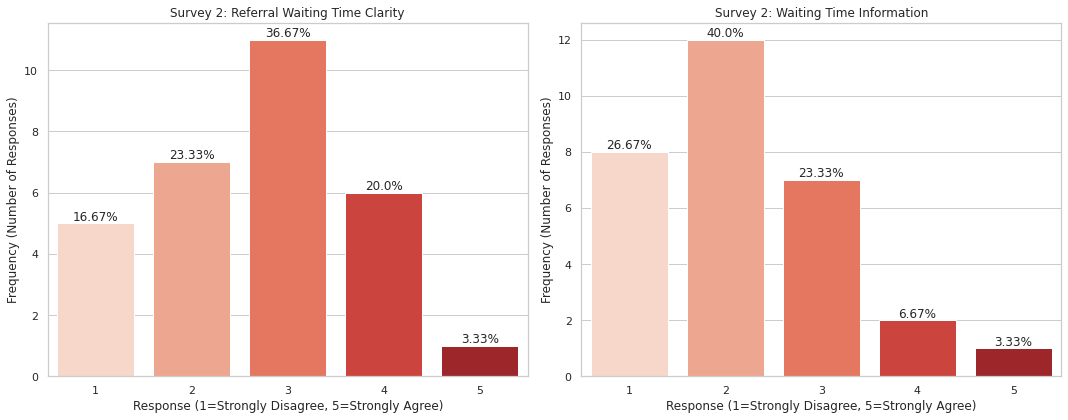

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming survey2_data is already loaded and processed

survey2_referral_clarity = survey2_data['When leaving the referral appointment it\'s clear what the waiting time will be for the next appointment'].dropna()
survey2_waiting_info = survey2_data[' When waiting for updates, I can easily obtain information on the current waiting time'].dropna()

# Adjusted Function to plot the survey responses with frequency on the y-axis and percentages on top
def plot_survey_responses(survey_data, title, ax, palette):
    # Ensure all categories from 1 to 5 are represented
    counts = survey_data.value_counts().sort_index()
    counts = counts.reindex(np.arange(1, 6), fill_value=0)  # Include all categories from 1 to 5
    total_responses = survey_data.notnull().sum()  # Total number of non-null responses
    percentages = (counts / total_responses * 100).round(2)  # Calculate percentages
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel('Response (1=Strongly Disagree, 5=Strongly Agree)')
    ax.set_ylabel('Frequency (Number of Responses)')
    ax.set_xticks(range(5))  # Show all values from 1 to 5
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    
    # Add percentage on top of each bar
    for index, value in enumerate(counts):
        percentage_text = f'{percentages.iloc[index]}%'
        ax.text(index, value, percentage_text, ha='center', va='bottom')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Corrected figsize for 3 subplots
plot_survey_responses(survey2_referral_clarity, 'Survey 2: Referral Waiting Time Clarity', axs[0], "Reds")
plot_survey_responses(survey2_waiting_info, 'Survey 2: Waiting Time Information', axs[1], "Reds")  # Correct subplot indexing
plt.tight_layout()
plt.show()


## Direction the NHS is heading

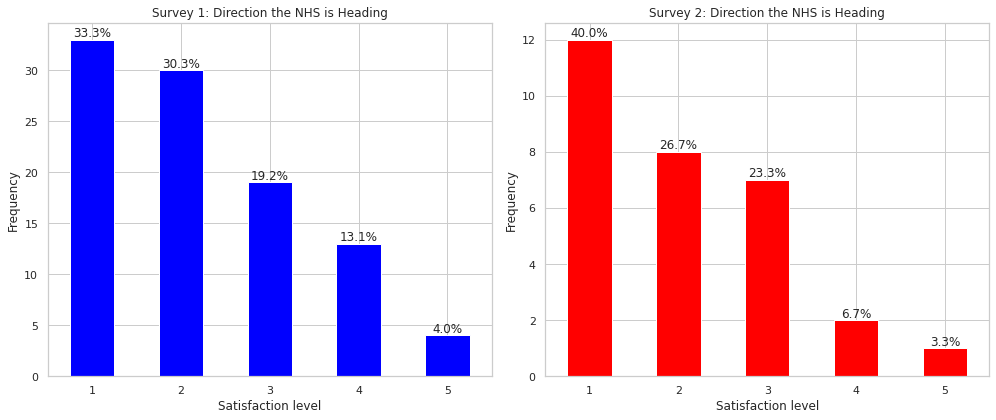

In [58]:
# Applying the grid in the background of the chart
sns.set(style="whitegrid")

# Apply the mapping to the 'Direction the NHS is heading' column in Survey 1
survey1_data['Direction the NHS is heading'] = survey1_data['Direction the NHS is heading'].map(response_mapping)

# Calculate frequencies for 'Direction the NHS is heading' responses
survey1_frequency = survey1_data['Direction the NHS is heading'].value_counts().sort_index()
survey2_frequency = survey2_data['Direction the NHS is heading'].value_counts().sort_index()

# Calculate the total number of responses to get the percentage
total_survey1_responses = survey1_data['Direction the NHS is heading'].notnull().sum()
total_survey2_responses = survey2_data['Direction the NHS is heading'].notnull().sum()

# Plot histograms for the 'Direction the NHS is heading' responses from both surveys side by side, with frequencies
plt.figure(figsize=(14, 6))

# Survey 1 Histogram for 'Direction the NHS is heading'
plt.subplot(1, 2, 1)
bars1 = survey1_frequency.plot(kind='bar', color='blue')
plt.title('Survey 1: Direction the NHS is Heading')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey1_frequency)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 1 with percentage
for bar in bars1.patches:
    percentage = (bar.get_height() / total_survey1_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

# Survey 2 Histogram for 'Direction the NHS is heading'
plt.subplot(1, 2, 2)
bars2 = survey2_frequency.plot(kind='bar', color='red')
plt.title('Survey 2: Direction the NHS is Heading')
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(survey2_frequency)), labels=[1, 2, 3, 4, 5], rotation=0)

# Annotate bars for Survey 2 with percentage
for bar in bars2.patches:
    percentage = (bar.get_height() / total_survey2_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Waiting Times

<ipython-input-99-275f72d423c6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=info["question"], data=info["data"], palette=palette, order=response_order)
<ipython-input-99-275f72d423c6>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.countplot(x=info["question"], data=info["data"], palette=palette, order=response_order)
<ipython-input-99-275f72d423c6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=info["question"], data=info["data"], palette=palette, order=response_order)
<ipython-input-99-275f72d423c6>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax 

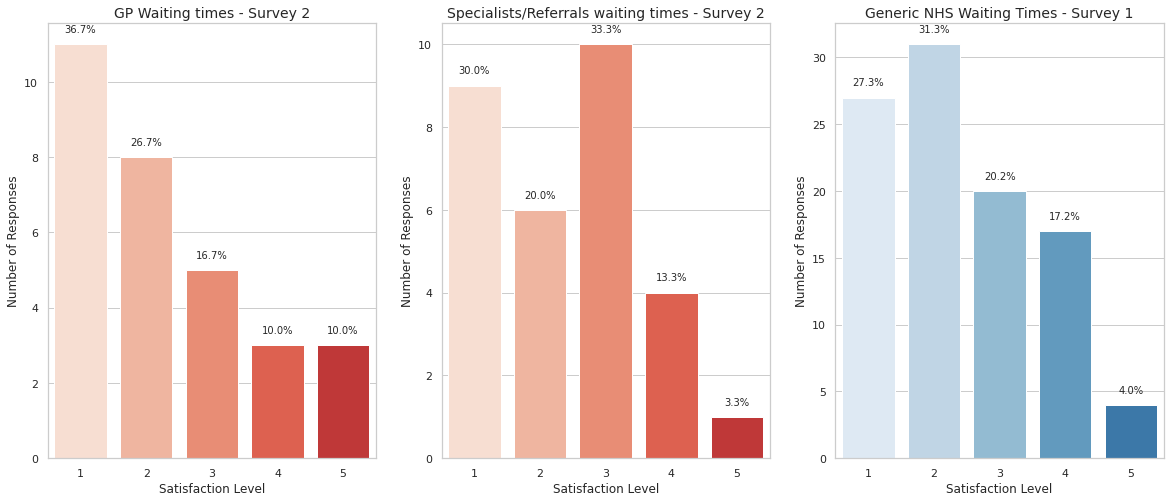

In [99]:
# Apply mapping to the 'Waiting times' column in Survey 1 data
survey1_data['Waiting times'] = survey1_data['Waiting times'].map(response_mapping)

# Trim whitespace from column names in both DataFrames just in case
survey1_data.columns = survey1_data.columns.str.strip()
survey2_data.columns = survey2_data.columns.str.strip()

# Adjusted questions_info with corrected column names and ensured they exist in the data
questions_info = [
    {"question": "GP Waiting times", "data": survey2_data, "is_survey1": False, "palette": "Reds", "title": "GP Waiting times - Survey 2"},
    {"question": "Specialists - Referrals waiting times", "data": survey2_data, "is_survey1": False, "palette": "Reds", "title": "Specialists/Referrals waiting times - Survey 2"},
    {"question": "Waiting times", "data": survey1_data, "is_survey1": True, "palette": "Blues", "title": "Generic NHS Waiting Times - Survey 1"}
]

# Setting up the visualization style
sns.set(style="whitegrid")

# Adjust the figure size for a taller plot
plt.figure(figsize=(20, 8))

# Define the order of responses for plotting consistency
response_order = [1, 2, 3, 4, 5]

# Plotting each question
for i, info in enumerate(questions_info):
    plt.subplot(1, 3, i + 1)  # Creating a subplot for each question
    
    # Select palette based on the survey
    palette = sns.color_palette(info["palette"])
    
    # Plotting the countplot
    ax = sns.countplot(x=info["question"], data=info["data"], palette=palette, order=response_order)
    
    # Apply the custom title from the 'title' key in questions_info
    ax.set_title(info["title"], fontsize=14)  # Increased font size for the title
    
    # Enlarge label text
    ax.set_xlabel('Satisfaction Level', fontsize=12)
    ax.set_ylabel('Number of Responses', fontsize=12)
    
    # Calculate total responses for annotation
    total_responses = info["data"][info["question"]].dropna().shape[0]
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses if total_responses > 0 else 0)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        # Adjust the y position for annotation to place it above the bar
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center', va='bottom', fontsize=10)


## Hospital direction are clear

<ipython-input-135-40385a7a052e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='Directions within the hospitals are clear and easy to follow', data=survey1_data, palette='Blues', order=response_order)
<ipython-input-135-40385a7a052e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='Directions within the hospitals are clear and easy to follow', data=survey2_data, palette='Reds', order=response_order)


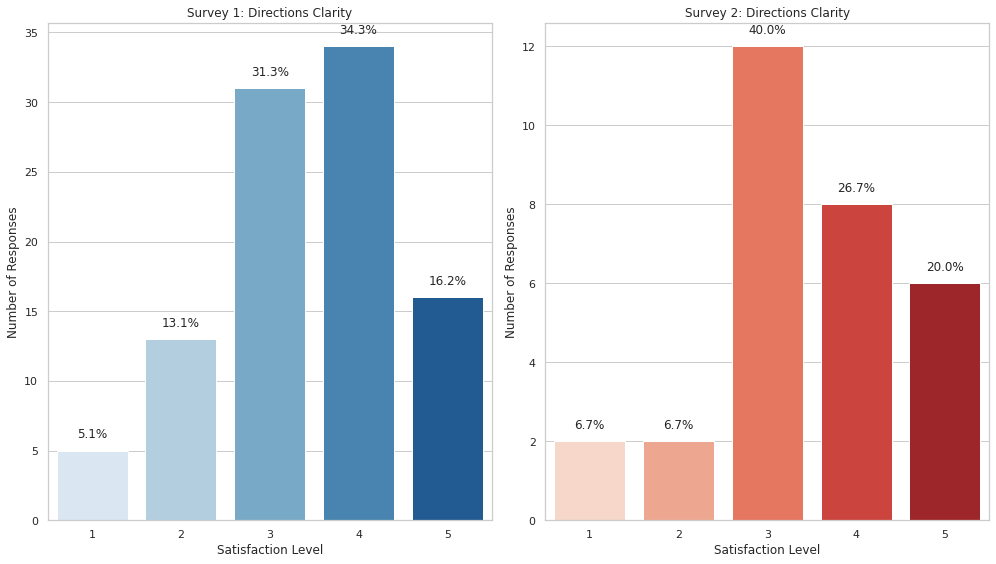

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping for Survey 1 responses from text to numeric values
response_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# Apply the mapping to Survey 1
survey1_data['Directions within the hospitals are clear and easy to follow'] = survey1_data['Directions within the hospitals are clear and easy to follow'].map(response_map)


# Setting up the visualization style
sns.set(style="whitegrid")

# Define the order of responses for plotting consistency across both surveys
response_order = [1, 2, 3, 4, 5]

# Adjust the figure size
plt.figure(figsize=(14, 8))

# Plot for Survey 1
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Directions within the hospitals are clear and easy to follow', data=survey1_data, palette='Blues', order=response_order)
plt.title('Survey 1: Directions Clarity')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')

# Annotate bars with percentage for Survey 1
total_responses_1 = len(survey1_data['Directions within the hospitals are clear and easy to follow'].dropna())
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses_1 if total_responses_1 > 0 else 0)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')

# Plot for Survey 2
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Directions within the hospitals are clear and easy to follow', data=survey2_data, palette='Reds', order=response_order)
plt.title('Survey 2: Directions Clarity')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')

# Annotate bars with percentage for Survey 2
total_responses_2 = len(survey2_data['Directions within the hospitals are clear and easy to follow'].dropna())
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses_2 if total_responses_2 > 0 else 0)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# QR Code Perceptions

## QR Code, Have you used it for...? - Survey 1 & 2

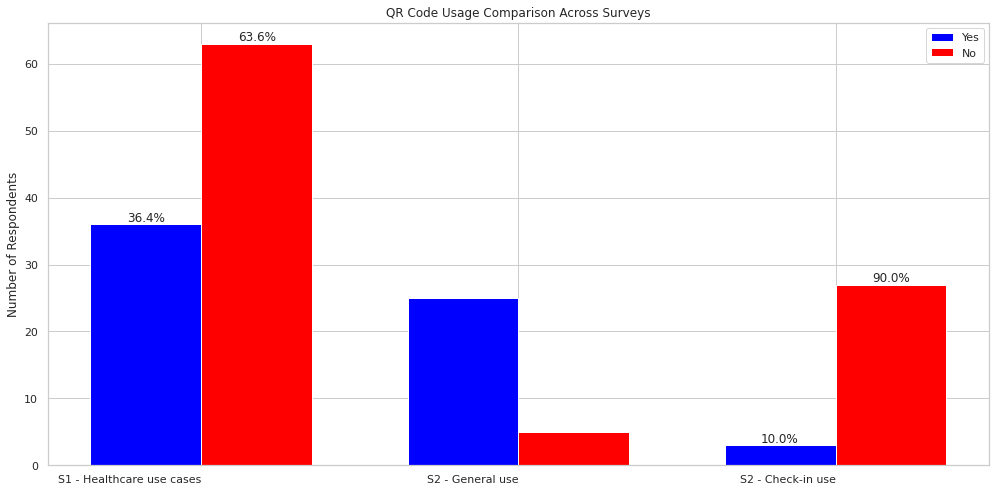

In [136]:
# Setting up the figure and axes
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Questions from Survey 1 and Survey 2
questions_survey1 = ['Have you ever used QR codes for healthcare-related purposes?']
questions_survey2 = ['Have you ever used QR codes?', 'Have you ever used QR codes for hospital check-ins?']

# Get counts for Survey 1 and Survey 2
survey1_yes_counts = []
survey1_no_counts = []
survey2_yes_counts = []
survey2_no_counts = []

for question in questions_survey1:
    survey1_yes_counts.append(survey1_data[question].value_counts().get('Yes', 0))
    survey1_no_counts.append(survey1_data[question].value_counts().get('No', 0))

for question in questions_survey2:
    survey2_yes_counts.append(survey2_data[question].value_counts().get('Yes', 0))
    survey2_no_counts.append(survey2_data[question].value_counts().get('No', 0))

# Plotting
ind = np.arange(len(questions_survey1) + len(questions_survey2))  # Number of questions
width = 0.35  # Width of bars

# Survey 1 Bars (Only one question in this case)
plt.bar(ind[0] - width/2, survey1_yes_counts[0], width, label='Survey 1 Yes', color='blue')
plt.bar(ind[0] + width/2, survey1_no_counts[0], width, label='Survey 1 No', color='red')

# Annotate Survey 1 bars with percentages
total_survey1 = survey1_yes_counts[0] + survey1_no_counts[0]
plt.text(ind[0] - width/2, survey1_yes_counts[0], f'{(survey1_yes_counts[0] / total_survey1) * 100:.1f}%', ha='center', va='bottom')
plt.text(ind[0] + width/2, survey1_no_counts[0], f'{(survey1_no_counts[0] / total_survey1) * 100:.1f}%', ha='center', va='bottom')

# Survey 2 Bars
for i, (yes_count, no_count) in enumerate(zip(survey2_yes_counts, survey2_no_counts), start=1):
    plt.bar(ind[i] - width/2, yes_count, width, label=f'Survey 2 Yes - Q{i}', color='blue')
    plt.bar(ind[i] + width/2, no_count, width, label=f'Survey 2 No - Q{i}', color='red')
    
# Annotate Survey 2 bars with percentages
total_survey2 = yes_count + no_count
plt.text(ind[i] - width/2, yes_count, f'{(yes_count / total_survey2) * 100:.1f}%', ha='center', va='bottom')
plt.text(ind[i] + width/2, no_count, f'{(no_count / total_survey2) * 100:.1f}%', ha='center', va='bottom')

plt.ylabel('Number of Respondents')
plt.title('QR Code Usage Comparison Across Surveys')

plt.xticks(ind, ['S1 - Healthcare use cases', 'S2 - General use', 'S2 - Check-in use'], rotation=0, ha="right")

# Simplify legend
plt.legend(['Yes', 'No'], loc='best')
plt.tight_layout()
plt.tight_layout()

plt.show()

## How User Friendly do you perceive QR codes to be? - Survey 1 & 2

In [142]:
# Extract responses to the user-friendliness question
survey1_user_friendly = survey1_data["On a scale of 1 to 7, how user-friendly do you perceive QR codes to be?"]
survey2_user_friendly = survey2_data["On a scale of 1 to 7, how user-friendly do you perceive QR codes to be?"]

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Function to annotate bars with percentage
def annotate_bars(ax):
    for p in ax.patches:
        total = len(survey1_user_friendly.dropna()) if '1' in ax.get_title() else len(survey2_user_friendly.dropna())
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Plotting the distribution of responses for Survey 1
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x=survey1_user_friendly, palette='Blues', ax=ax1)
plt.title('Survey 1: User-Friendliness of QR Codes')
plt.xlabel('User-Friendly Scale (1 to 7)')
plt.ylabel('Number of Responses')
annotate_bars(ax1)

# Plotting the distribution of responses for Survey 2
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x=survey2_user_friendly, palette='Reds', ax=ax2)
plt.title('Survey 2: User-Friendliness of QR Codes')
plt.xlabel('User-Friendly Scale (1 to 7)')
plt.ylabel('Number of Responses')
annotate_bars(ax2)

plt.tight_layout()
plt.show()

KeyError: 'On a scale of 1 to 7, how user-friendly do you perceive QR codes to be?'

## QR Codes: Easy, convenient, boosting UX? - Survey

<ipython-input-105-271315ab8319>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
<ipython-input-105-271315ab8319>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
<ipython-input-105-271315ab8319>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)


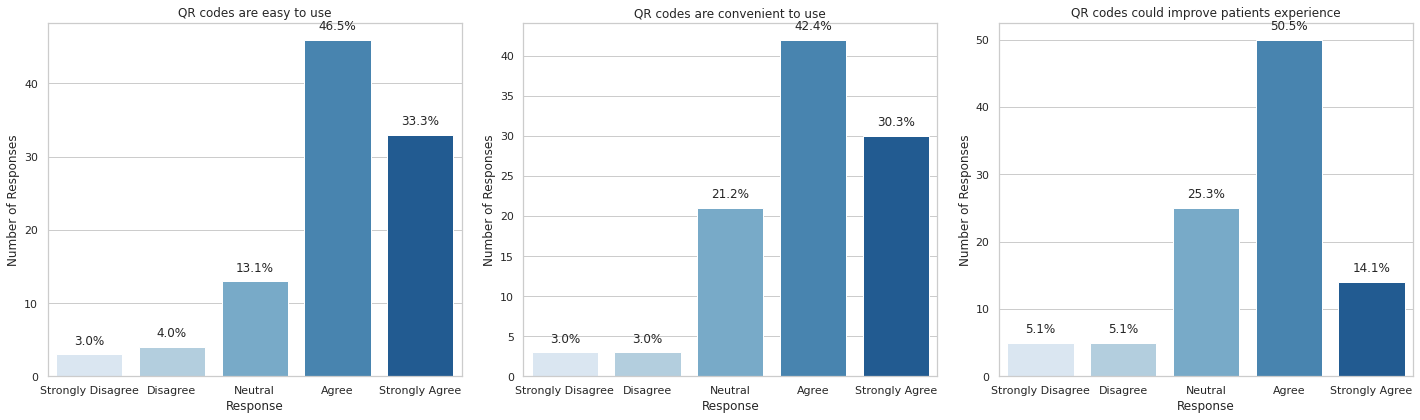

In [105]:
# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Questions from Survey 1
questions = [
    "QR codes are easy to use ", 
    "QR codes are convenient to use",
    "QR codes could improve patients experience"
]

# Plotting each question
for i, question in enumerate(questions):
    plt.subplot(1, 3, i + 1)  # Creating a subplot for each question
    ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
    ax.set_title(question.strip())
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Responses')
    
    # Calculate total responses for annotation
    total_responses = len(survey1_data[question].dropna())
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# QR Code in Check-Ins

## Would it save time, be useful, boost UX? - Survey 2

<ipython-input-106-6a3ec2643490>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
<ipython-input-106-6a3ec2643490>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
<ipython-input-106-6a3ec2643490>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_

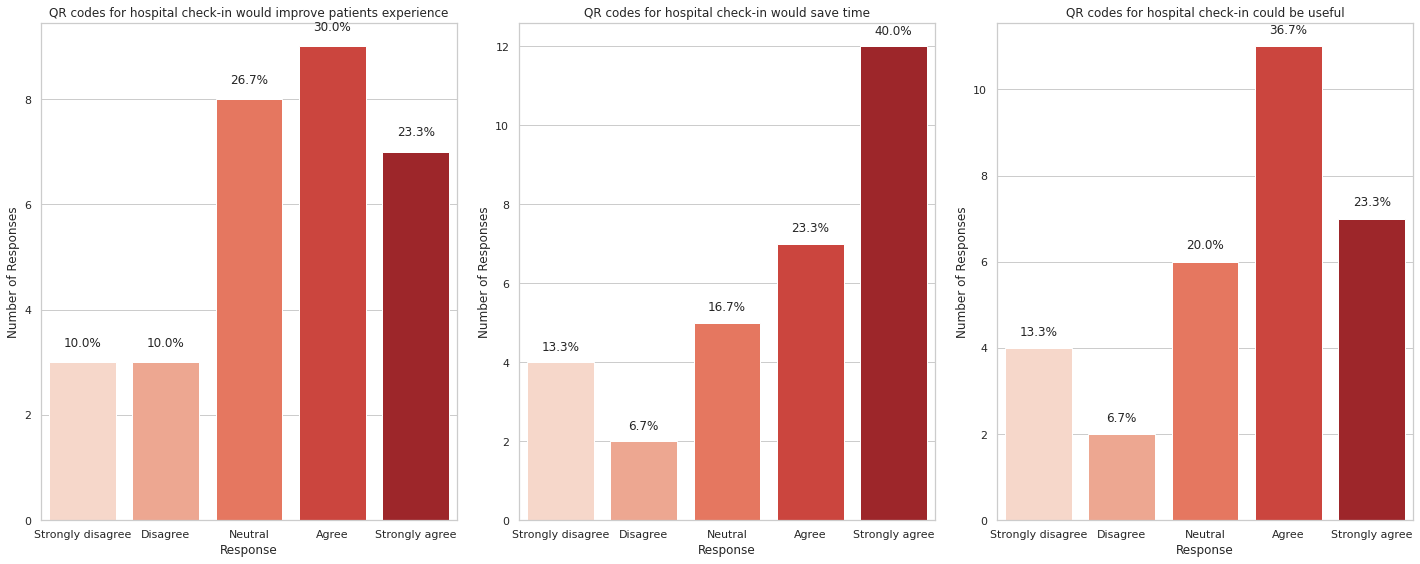

In [106]:
# Questions from Survey 2 regarding QR codes for hospital check-in
questions_survey2 = [
    "QR codes for hospital check-in would improve patients experience",
    "QR codes for hospital check-in would save time",
    "QR codes for hospital check-in could be useful"
]

# Apply the mapping to Survey 2's responses for each relevant question
for question in questions_survey2:
    survey2_data[question] = survey2_data[question].map(response_mappings)

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

# Plotting each question
for i, question in enumerate(questions_survey2):
    plt.subplot(1, len(questions_survey2), i + 1)  # Creating a subplot for each question
    ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
    ax.set_title(question)
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Responses')
    
    # Calculate total responses for annotation
    total_responses = len(survey2_data[question].dropna())
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + (0.01 * total_responses)  # Adjust offset for visibility
        ax.annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.show()

## Would it be useful? Would I use it? - Survey 1

<ipython-input-107-4d0d589232ab>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
<ipython-input-107-4d0d589232ab>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)


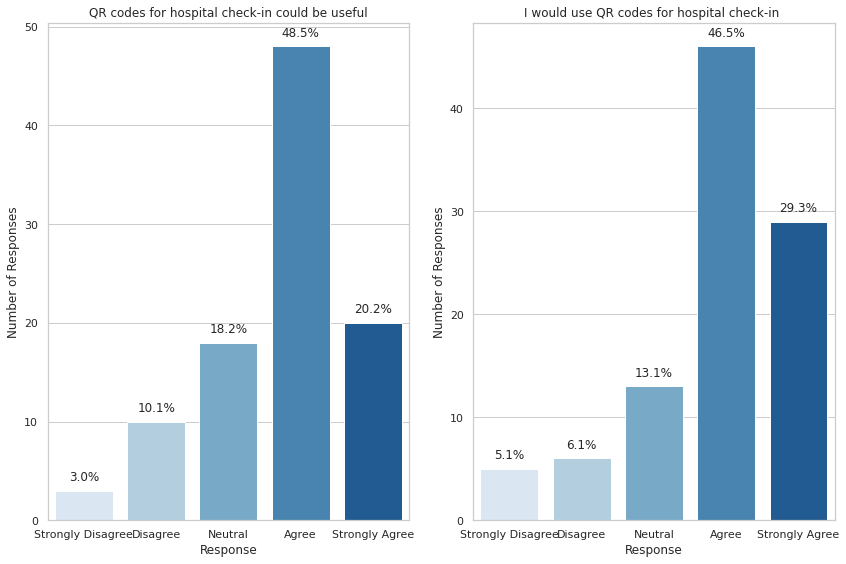

In [107]:
# Questions from Survey 1 regarding QR codes for hospital check-in
questions_survey1 = [
    "QR codes for hospital check-in could be useful",
    "I would use QR codes for hospital check-in "  
]

# Define the order of responses
response_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plotting each question
for i, question in enumerate(questions_survey1):
    plt.subplot(1, len(questions_survey1), i + 1)  # Creating a subplot for each question
    ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
    ax.set_title(question)
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Responses')
    
    # Calculate total responses for annotation
    total_responses = survey1_data[question].notna().sum()
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# QR code and appointment management 

## Would QR code be useful, better than traditional ways, boost UX? - Survey 2

<ipython-input-108-efc1886f534a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=response_mappings.values())
<ipython-input-108-efc1886f534a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=response_mappings.values())
<ipython-input-108-efc1886f534a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=response_mappings.values())


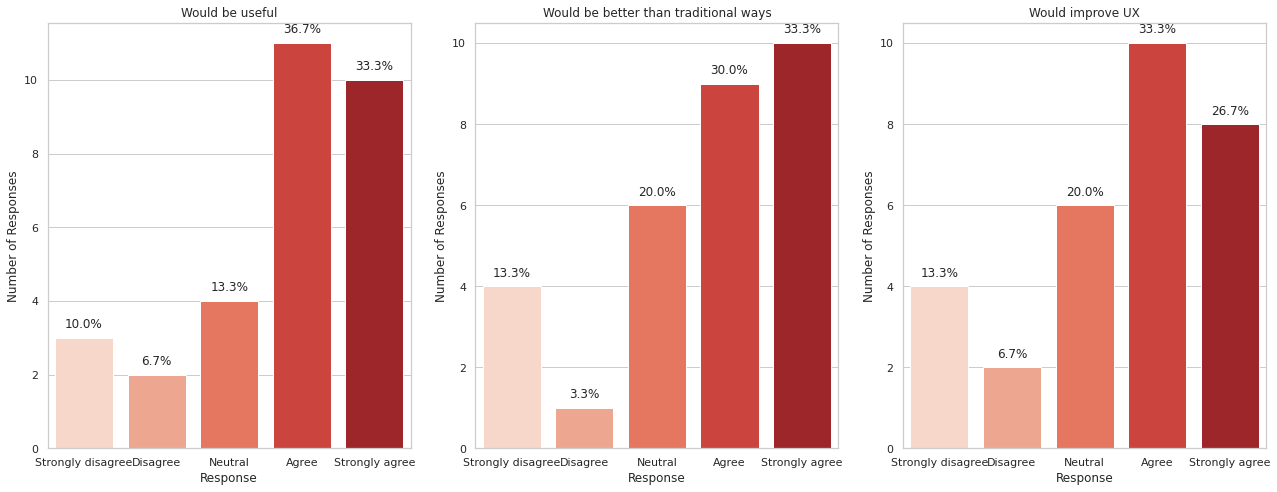

In [108]:
# Original questions from Survey 2 regarding QR codes for appointment management
questions_survey2 = [
    "QR codes to manage appointments would be useful",
    "QR codes to confirm/cancel doctor appointment would be better than the traditional phone call",
    "QR codes for appointment management would improve patient experience"
]

# New titles for the questions to be used as subplot titles
new_titles = [
    "Would be useful",
    "Would be better than traditional ways",
    "Would improve UX"
]

# Apply the mapping to Survey 2's responses for each relevant question
for question in questions_survey2:
    survey2_data[question] = survey2_data[question].map(response_mappings)

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(18, 7))  # Adjust the figure size based on the number of questions

# Plotting each question with new titles
for i, (question, new_title) in enumerate(zip(questions_survey2, new_titles)):
    plt.subplot(1, len(questions_survey2), i + 1)  # Creating a subplot for each question
    ax = sns.countplot(x=question, data=survey2_data, palette='Reds', order=response_mappings.values())
    ax.set_title(new_title)  # Use the new simplified title
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Responses')
    
    # Calculate total responses for annotation
    total_responses = survey2_data[question].notna().sum()
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%' .format(100 * p.get_height() / total_responses)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

## Would QR code be useful, would I use it? - Survey 1

<ipython-input-109-f3e73a5ea7c8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
<ipython-input-109-f3e73a5ea7c8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)


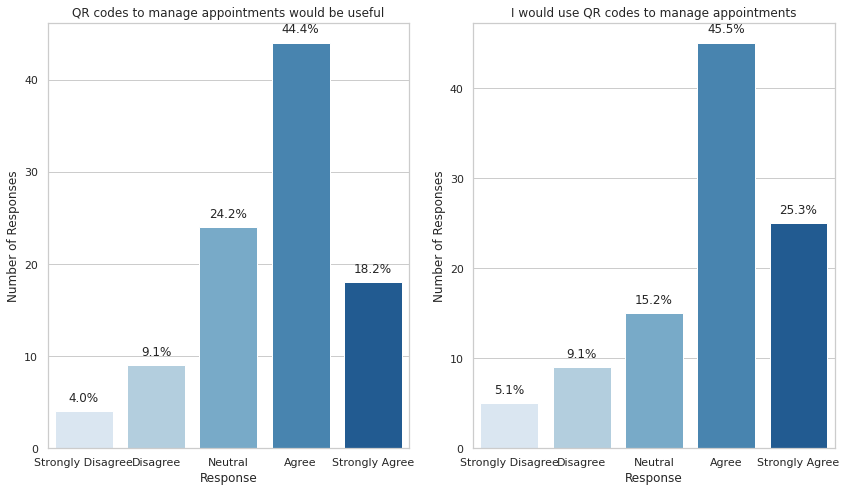

In [109]:
# Questions from Survey 1 related to QR codes and appointment management
questions_survey1 = [
    "QR codes to manage appointments would be useful",
    "I would use QR codes to manage appointments"
]

# Define the order of responses
response_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))  # Adjust the figure size as needed

# Plotting each question
for i, question in enumerate(questions_survey1):
    plt.subplot(1, len(questions_survey1), i + 1)  # Creating a subplot for each question
    ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=response_order)
    ax.set_title(question)
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Responses')
    
    # Calculate total responses for annotation
    total_responses = survey1_data[question].notna().sum()
    
    # Annotate bars with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Extra

## Have you ever left feedback?

<ipython-input-110-284dffda0be0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=['Yes', 'No'])


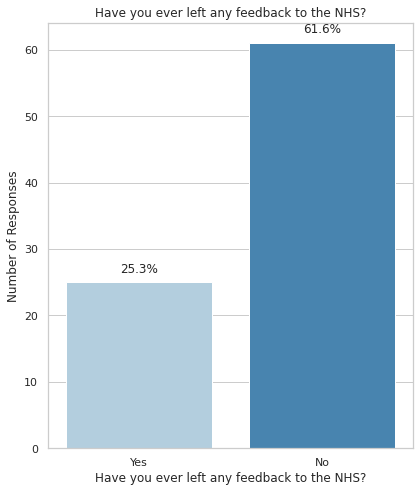

In [110]:
# Define the question
question = "Have you ever left any feedback to the NHS?"

# Setting up the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(6, 7))  # Adjust the figure size as needed

# Creating the bar plot
ax = sns.countplot(x=question, data=survey1_data, palette='Blues', order=['Yes', 'No'])
ax.set_title("Have you ever left any feedback to the NHS?")
ax.set_ylabel('Number of Responses')

# Calculate total responses for annotation
total_responses = survey1_data[question].notna().sum()

# Annotate bars with percentage
for p in ax.patches:
    percentage = '{:.1f}%' .format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

## Do you use the NHS application? 

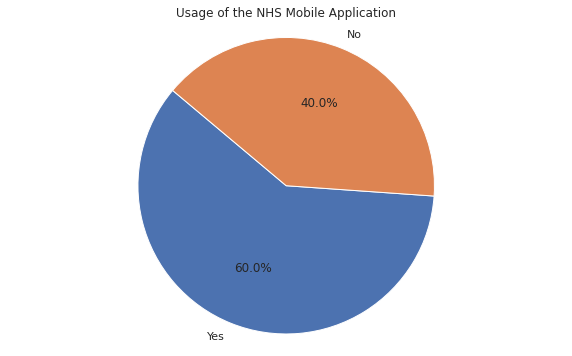

In [8]:
# Identifying the NHS mobile app usage column
nhs_app_usage_column = 'Do you use the NHS mobile application?'

# Extracting the data for the NHS mobile app usage column
nhs_app_usage_data = survey2_data[nhs_app_usage_column].value_counts(normalize=True) * 100

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(nhs_app_usage_data, labels=nhs_app_usage_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Usage of the NHS Mobile Application')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the pie chart
plt.show()


## Keyworks takeaway from open question - Survey 1 & 2

In [143]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

### Frequency Distribution of Common Words

[nltk_data] Downloading package punkt to
[nltk_data]     /home/students/efior001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/efior001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


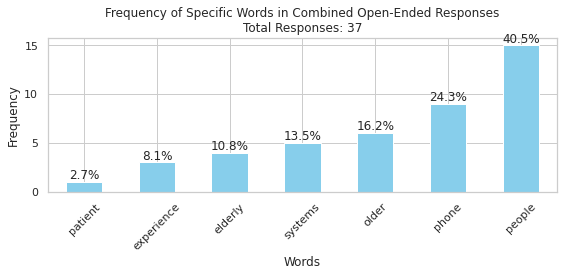

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure the NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Assuming survey1_data and survey2_data are your DataFrames
# and they're already loaded with the appropriate data

# Combine the responses from both surveys for the specific open-ended question
combined_responses = pd.concat([
    survey1_data["If you want, feel free to drop any thoughts or comments you've got!\n\n"].dropna(),
    survey2_data["If you want, feel free to drop any thoughts or comments you've got!\n\n"].dropna()
])

# Total count of combined non-NaN responses
total_responses = len(combined_responses)

# Concatenate all responses into a single string for analysis
text = ' '.join(combined_responses).lower()

# Tokenize the text
tokens = word_tokenize(text)

# Remove punctuation and stop words
words = [word for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_frequency = pd.Series(filtered_words).value_counts()

# Filter for specific words of interest
specific_words = ["people", "elderly", "systems", "phone", "patient", "experience", "older"]
filtered_frequency = word_frequency.loc[specific_words]

# Sort the filtered frequency from smaller to bigger before plotting
filtered_frequency = filtered_frequency.sort_values()

# Plotting
plt.figure(figsize=(8, 4))
bars = filtered_frequency.plot(kind='bar', color='skyblue')
plt.title(f'Frequency of Specific Words in Combined Open-Ended Responses\nTotal Responses: {total_responses}')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Annotate percentage above each bar
for bar in bars.patches:
    height = bar.get_height()
    percentage = f'{height / total_responses * 100:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2., height, percentage, ha='center', va='bottom')

plt.tight_layout()
plt.show()


### N-grams and Collocations

In [146]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# Assuming survey1_data and survey2_data are already loaded

column_name_survey1 = "If you want, feel free to drop any thoughts or comments you've got!\n\n" 
column_name_survey2 = "If you want, feel free to drop any thoughts or comments you've got!\n\n"

# Combine the responses into one Series
combined_responses = pd.concat([survey1_data[column_name_survey1], survey2_data[column_name_survey2]], ignore_index=True).dropna()

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Combine all responses into one large text
large_text = ' '.join(combined_responses)

# Tokenize the text
tokens = word_tokenize(large_text)

# Convert to lowercase and filter out non-alphabetical tokens
tokens = [word.lower() for word in tokens if word.isalpha()]

# Enhance the stopwords list with specific unwanted words
custom_stop_words = ["qr", "code", "would", "codes", "nhs"]
stop_words = set(stopwords.words('english')).union(custom_stop_words)

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stop_words]

# Generate bigrams and trigrams
bigram_measures = BigramAssocMeasures()
trigram_measures = TrigramAssocMeasures()

# Finders for bigrams and trigrams
bigram_finder = BigramCollocationFinder.from_words(filtered_tokens)
trigram_finder = TrigramCollocationFinder.from_words(filtered_tokens)

# Applying frequency filters to n-grams
bigram_finder.apply_freq_filter(3)  # Only bigrams that appear 3+ times
trigram_finder.apply_freq_filter(2)  # Only trigrams that appear 2+ times

# Get the top 10 n-grams by their frequency
top_bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 10)
top_trigrams = trigram_finder.nbest(trigram_measures.raw_freq, 10)

# Print the top n-grams
print("Top 10 bigrams:", top_bigrams)
print("Top 10 trigrams:", top_trigrams)

# Find the top 10 collocations based on PMI
top_bigrams_pmi = bigram_finder.nbest(bigram_measures.pmi, 10)
top_trigrams_pmi = trigram_finder.nbest(trigram_measures.pmi, 10)

# Print the top collocations
print("Top 10 bigram collocations:", top_bigrams_pmi)
print("Top 10 trigram collocations:", top_trigrams_pmi)


Top 10 bigrams: [('older', 'people'), ('tech', 'savvy')]
Top 10 trigrams: [('without', 'smart', 'phones')]
Top 10 bigram collocations: [('tech', 'savvy'), ('older', 'people')]
Top 10 trigram collocations: [('without', 'smart', 'phones')]


[nltk_data] Downloading package punkt to
[nltk_data]     /home/students/efior001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/efior001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
